### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import pandas_profiling
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from pandas import Series, DataFrame

sb.set(style="darkgrid")

### Importing CSV Files

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Explanatory Analysis - Getting to Know the Data

In [3]:
test.info()
print('---'*20)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    in

In [4]:
print("Train is a {} by {} dataset.".format(train.shape[0], train.shape[1]))
print("\n")
print("Test is a {} by {} dataset".format(test.shape[0], test.shape[1]))

Train is a 891 by 12 dataset.


Test is a 418 by 11 dataset


In [5]:
print(train.isnull().sum(), sep='\n')
print('-'*20)
print(test.isnull().sum(), sep='\n')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We make note that Age, Cabin and Embarked have missing values in train dataset and Age, Fare and Cabin have missing values in Test dataset. We can also visualize this using Seaborn.

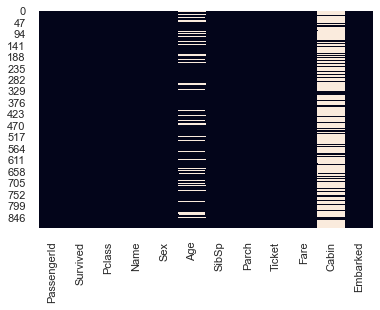

In [6]:
sb.heatmap(train.isnull(), cbar = False)

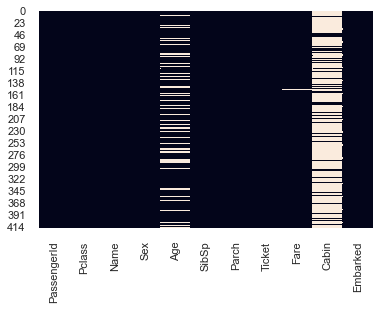

In [7]:
sb.heatmap(test.isnull(), cbar = False)

In [8]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Goodwin, Master. Harold Victor",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Carlsson, Mr. Carl Robert",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [10]:
list(train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see <i>PassengerId</i> field is just an identifier and is irrelevant in determining if a person survives. Thefore, we can drop it for the rest of the analysis.

In [12]:
train.drop('PassengerId', axis=1, inplace = True)
test.drop('PassengerId', axis=1, inplace = True)

After <i>PassengerId</i> we have the <i>Survived</i> field. This is a very important field filled with 0 and 1's, indicating whether a person survived the incident or not. Train dataset contains this field, but not test dataset. Our eventual goal is to predict those values for the test dataset.

Next we come across the <i>Pclass</i> field. This is a "A proxy for socio-economic status (SES)
<br> 1st = Upper
<br> 2nd = Middle
<br> 3rd = Lower"
<br>Let's explore more.

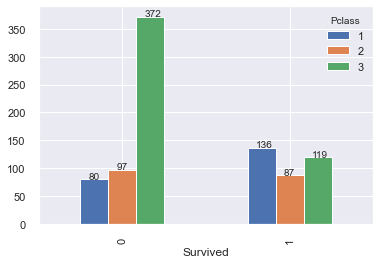

In [13]:
ax1 = pd.crosstab(train.Survived, train.Pclass).plot(kind = 'bar')
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + 0.05, p.get_height() + 1))

We can see passengers that are in the Upper class are more likely to survive.

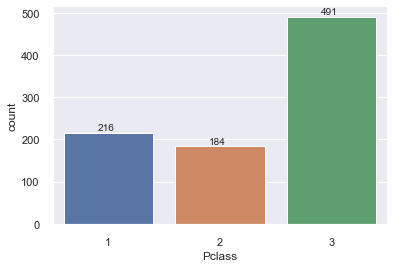

In [14]:
ax2 = sb.countplot(x='Pclass', data=train)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() + 5))

While there are more passengers in Lower class, the number of survivors from the Upper class is more than Lower class. This goes to show the Passenger Class is an important feature and we will keep it. Since it's already in numercial format, no further manipulation is required.

Now let's look more into the next field, <i>Name</i>.

In [15]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

We can see some name are trimmed with ... We can fix that by setting the following parameters. 

In [16]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [17]:
train.Name

0                                  Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Thayer)
2                                   Heikkinen, Miss. Laina
3             Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                 Allen, Mr. William Henry
                              ...                         
886                                  Montvila, Rev. Juozas
887                           Graham, Miss. Margaret Edith
888               Johnston, Miss. Catherine Helen "Carrie"
889                                  Behr, Mr. Karl Howell
890                                    Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Let's see how many unique names are in the dataset.

In [18]:
print("There are {} unique names in the train dataset.".format(train.Name.nunique()))

There are 891 unique names in the train dataset.


All names are unique as expected.

The name of indivuals are irrelevant when it comes to survival. That is if a person's name is John, it does not really help us to determine whether John survived. It may give us the gender of the person, but we already have the <i>Sex</i> field. However, <i>Name</i> contains the title of people (i.e. Mr., Mrs.). That can give us more insight. First we need to extract them. Fortunately, we can tell the data is clean and all the titles are before a '.'. Therefore, we need to extract those characters that come before the dot. We are going to use some Regular Expression (re) technique for this part.

In [19]:
train['Title'] = train.Name.str.extract(r'([a-zA-Z]+)\.', expand=False)
train.Title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

Now let's see how many unique titles there are in the dataset. We should expect a number much lower than 891, the number of unique names.

In [20]:
print("There are {} unique titles in the train dataset.".format(train.Title.nunique()))

There are 17 unique titles in the train dataset.


And that matches our intuition. Now let's see their frequencies.

In [21]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Don           1
Ms            1
Countess      1
Capt          1
Sir           1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

We can see a lot of values occur less than 10 times. We can replace those titles with 'Others' instead.

In [22]:
train.loc[train.groupby('Title')['Title'].transform('size') < 10, 'Title'] = 'Others'

We can check if the code worked as intended.

In [23]:
train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

Now we are going to plot Title vs. Survived to see if we can determine any pattern.

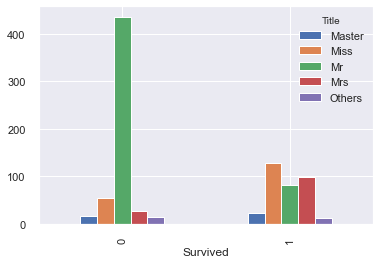

In [24]:
pd.crosstab(train.Survived, train.Title).plot(kind='bar')

Our first observation is that men are less likely to survive. We should expect to see a low rate of survival for men once we examine <i>Sex</i> field. More women survived than those that did not.

Now we will examine the survival rate within a specific group, title frequency and overall survival rate based on each title. 

<ul>
<li>Survival rate within a specific title group tells how many people of that title survived among themselves. For instance 79% of those that had a title 'Mrs' survived. </li>
<li>Title Frequency tells us how many passengers had that specific title. For instance, only 4% of those in the traininig set were 'Master'. </li>
<li>Overall Survival shows us survival rate in comparison to other groups. For instance, about 24% of survivals were titled 'Mr'. As we will see, only 23% of them were among the survivals. </li>
</ul>

You should note Title Frequency and Overall Survival should add up to 1, while Survival within Title Group need not.

In [25]:
Title_Survived=train[['Title', 'Survived']].groupby(['Title'], as_index=False) \
                    .mean().sort_values(by='Survived',ascending=False)
Title_Survived.rename(columns={'Survived':'Survival within Title Group'}, inplace = True)

Title_Survived['Title Frequency']=train.Title.value_counts(normalize=True) \
                    .reindex(Title_Survived.Title).tolist()
Title_Survived['Overall Survival']=train[train.Survived == 1].Title.value_counts(normalize=True) \
                    .reindex(Title_Survived.Title).tolist()

In [26]:
Title_Survived

,Title,Survival within Title Group,Title Frequency,Overall Survival
3,Mrs,0.792000,0.140292,0.289474
1,Miss,0.697802,0.204265,0.371345
0,Master,0.575000,0.044893,0.067251
4,Others,0.444444,0.030303,0.035088
2,Mr,0.156673,0.580247,0.236842


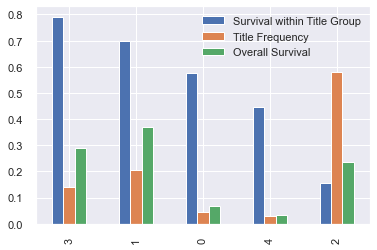

In [27]:
Title_Survived.plot(kind='bar', legend=True)

We analyzed <i>Title</i> field, which was derived from the Name field. Before moving on, we need to change this categorical variable to an ordinal so we can run models later. <i>Name</i> field can be dropped. In short, we should handle all the fields that have string and have some numerical values for them. 
<br> Also any changes  we make to train data set must be made to the test data set.

In [28]:
train['Title']=train.Title.replace({'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Others':5})

In [29]:
train.drop('Name',axis=1,inplace=True)

Making changes to Test dataset

In [30]:
test['Title'] = test.Name.str.extract(r'([a-zA-Z]+)\.', expand=False)

In [31]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

It is safe to run the following code. If value counts for any of the values that were less than 10 in the train data set was more than 10 for the test data set, then we needed to pass in a dictionary. Passing in a dictionary is usually a more robust method.

In [32]:
test.loc[test.groupby('Title')['Title'].transform('size') < 10, 'Title'] = 'Others'
test['Title']=test.Title.replace({'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Others':5})
test.drop('Name',axis=1,inplace=True)

Just a quick sanity check that everything is working as intended.

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


In [34]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,1
1,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,1
3,3,male,27.0,0,0,315154,8.6625,NaN,S,1
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


Next we are going to examine <i>Sex</i> field.

In [35]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

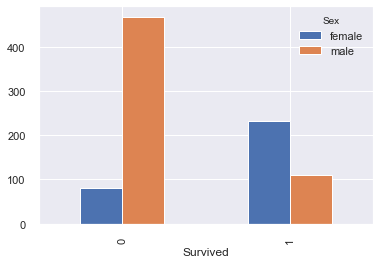

In [36]:
pd.crosstab(train.Survived, train.Sex).plot(kind='bar')

This confirms our observations when we were examining <i>Title</i>. Females were more likely so survive than men.

We can binarize our variable now.

In [37]:
train['Sex'] = train.Sex.replace({'male': 1, 'female': 0})

In [38]:
train.Sex.unique()

array([1, 0], dtype=int64)

Now we do the same for the test data set.

In [39]:
test['Sex'] = test.Sex.replace({'male': 1, 'female': 0})

In [40]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,1,35.0,0,0,373450,8.0500,NaN,S,1


In [41]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,1,34.5,0,0,330911,7.8292,NaN,Q,1
1,3,0,47.0,1,0,363272,7.0000,NaN,S,2
2,2,1,62.0,0,0,240276,9.6875,NaN,Q,1
3,3,1,27.0,0,0,315154,8.6625,NaN,S,1
4,3,0,22.0,1,1,3101298,12.2875,NaN,S,2


Now we get to <i>SibSp</i> and <i>Parch</i> fields. These are already numerical fields. According to the competition description:

<ul>
<li>sibsp: The dataset defines family relations in this way...
<br>Sibling = brother, sister, stepbrother, stepsister
<br>Spouse = husband, wife (mistresses and fiancés were ignored) </li> <br>
<li>parch: The dataset defines family relations in this way...
<br>Parent = mother, father
<br>Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them. </li>
</ul>

Among various ways in regards to analysis of these two fields, here are three suggestions: 
<ol>
<li>Combine the two fields and determine the family size of each individual.</li>
<li>Determine if each person is alone <code> (SibSp + Parch = 0) </code> or not.</li>
<li>Find people with the same last name to determine their family. This can get complicated since there might be people with the same last name but not from the same family or people that are part of one famliy but have different last names. </li>
</ol>

We will utilize the first two suggestions. That is, we determine family size and whether each person is alone by him/herself.

In [42]:
train['FamilySize'] = train.SibSp + train.Parch + 1 # add with one to account for that person in questions
train['Alone'] = 1 # creating a new field 'Alone', intializing it to 1
train.loc[train.SibSp + train.Parch > 0, 'Alone'] = 0 # those that are not alone will be set to 0

Now we are going to visualize the effects of family size and being alone on Survival.

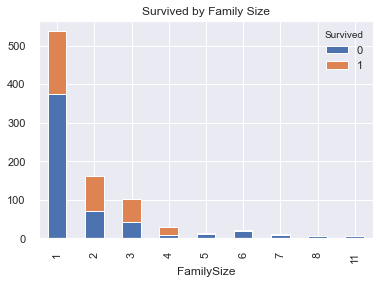

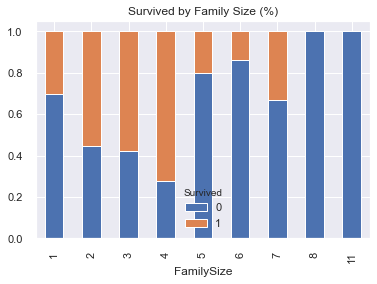

In [43]:
pd.crosstab(train['FamilySize'], train['Survived']). \
plot(kind='bar', stacked=True, title="Survived by Family Size")

pd.crosstab(train['FamilySize'], train['Survived'], normalize='index').\
plot(kind='bar', stacked=True, title="Survived by Family Size (%)")

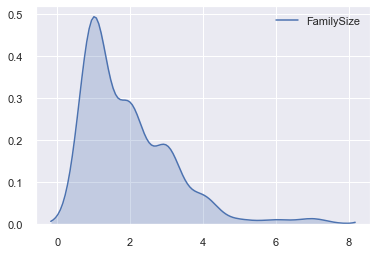

In [44]:
sb.kdeplot(train[train.Survived==1].FamilySize, shade=True);

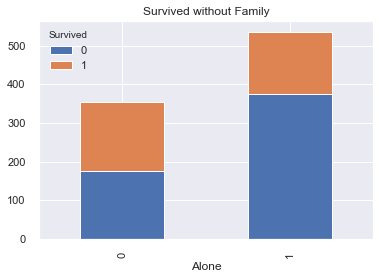

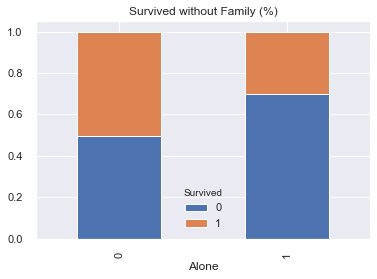

In [45]:
pd.crosstab(train['Alone'], train['Survived']). \
plot(kind='bar', stacked=True, title="Survived without Family")

pd.crosstab(train['Alone'], train['Survived'], normalize='index'). \
plot(kind='bar', stacked=True, title="Survived without Family (%)")

Based on these plots, we can group family size to 4 seperate categories:
<ol>
    <li>Family Size is 1</li>
    <li>Family Size is between 2 and 4 inclusive. </li>
    <li>Family Size is between 5 to 7 inclusive.</li>
    <li>Family Size is greater than 7. </li>
</ol>

The reason for this is that we see a pattern for survival based on the size of the family. The bigger the family the less likely they are to survive. The 'medium' sized families (2 to 4) are most likely survive.

Therefore we can create a new field <i>FamilySizeCategory</i> to account for that. We will visualize to see the results

In [46]:
train['FamilySizeCategory'] = 1

In [47]:
train.loc[(train.FamilySize>= 2) & (train.FamilySize <= 4), 'FamilySizeCategory'] = 2
train.loc[(train.FamilySize>= 5) & (train.FamilySize <= 7), 'FamilySizeCategory'] = 3
train.loc[(train.FamilySize> 7), 'FamilySizeCategory'] = 4

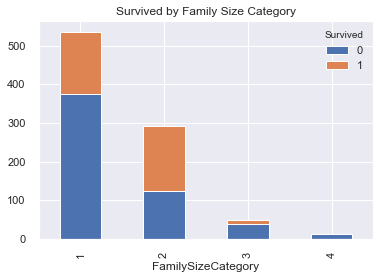

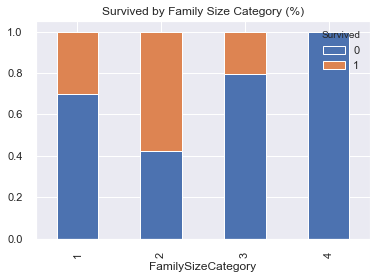

In [48]:
pd.crosstab(train['FamilySizeCategory'], train['Survived']). \
plot(kind='bar', stacked=True, title="Survived by Family Size Category")

pd.crosstab(train['FamilySizeCategory'], train['Survived'], normalize='index').\
plot(kind='bar', stacked=True, title="Survived by Family Size Category (%)")

As it can be seen, there is a a great survival rate for those in the second family size and no survival for number 4. Categories number 1 and 3 are really close. To avoid overfitting our modelling, we will drop <i>Family Size, SibSp</i> and <i>Parch</i> field and keep <i>Alone</i> and <i>Family Size Category </i> fields. Keeping <i>Alone</i> can help to distinguish between family size category 1 and 3 when training the model.

In [49]:
train.drop(['SibSp','Parch','FamilySize'], axis=1, inplace=True)

Now we apply the same changes to the train data set to be consistent.

In [50]:
test['FamilySize'] = test.SibSp + test.Parch + 1 
test['Alone'] = 1 
test.loc[test.SibSp + test.Parch > 0, 'Alone'] = 0 
test['FamilySizeCategory'] = 1
test.loc[(test.FamilySize>= 2) & (test.FamilySize <= 4), 'FamilySizeCategory'] = 2
test.loc[(test.FamilySize>= 5) & (test.FamilySize <= 7), 'FamilySizeCategory'] = 3
test.loc[(test.FamilySize> 7), 'FamilySizeCategory'] = 4
test.drop(['SibSp','Parch','FamilySize'], axis=1, inplace=True)

A quick sanity check to make sure everything looks good so far.

In [51]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Alone,FamilySizeCategory
0,0,3,1,22.0,A/5 21171,7.2500,NaN,S,1,0,2
1,1,1,0,38.0,PC 17599,71.2833,C85,C,2,0,2
2,1,3,0,26.0,STON/O2. 3101282,7.9250,NaN,S,3,1,1
3,1,1,0,35.0,113803,53.1000,C123,S,2,0,2
4,0,3,1,35.0,373450,8.0500,NaN,S,1,1,1


In [52]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Alone,FamilySizeCategory
0,3,1,34.5,330911,7.8292,NaN,Q,1,1,1
1,3,0,47.0,363272,7.0000,NaN,S,2,0,2
2,2,1,62.0,240276,9.6875,NaN,Q,1,1,1
3,3,1,27.0,315154,8.6625,NaN,S,1,1,1
4,3,0,22.0,3101298,12.2875,NaN,S,2,0,2


Next category we are going to look into is <i>Age</i>. As noted earlier, <i>Age</i> has many missing values and this is something that need to be addressed.

In [53]:
print('There are {} missing values in Age field.'.format(train.Age.isnull().sum()))

There are 177 missing values in Age field.


In [54]:
train.Age.value_counts(ascending = False)

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

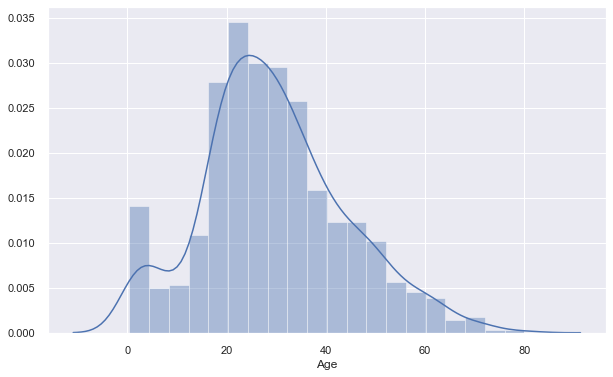

In [55]:
plt.figure(figsize=(10, 6))
sb.distplot(train.Age.dropna())

In [56]:
print('There are {} unique Age values (Null values are excluded).'.format(train.Age.nunique(dropna=True)))

There are 88 unique Age values (Null values are excluded).


For now, we will ignore missing values. 
<br>Leaving <i>Age</i> as-is is fine; however, following the same idea for creating <i>FamilySizeCategory</i>, we try to create <i>AgeCategory</i> feature based off of <i>Age</i>. We need to decide how we would like to cut off ages. Again, there are many options to go about this, but I propose to group them by age intervals. So for instance we can divide passengers based on their age group by 1, 5 or 10 years.
<br> The next point to resolve is to choose a good number that capture important aspects. To this end, we can plot various age groups to get a better idea.

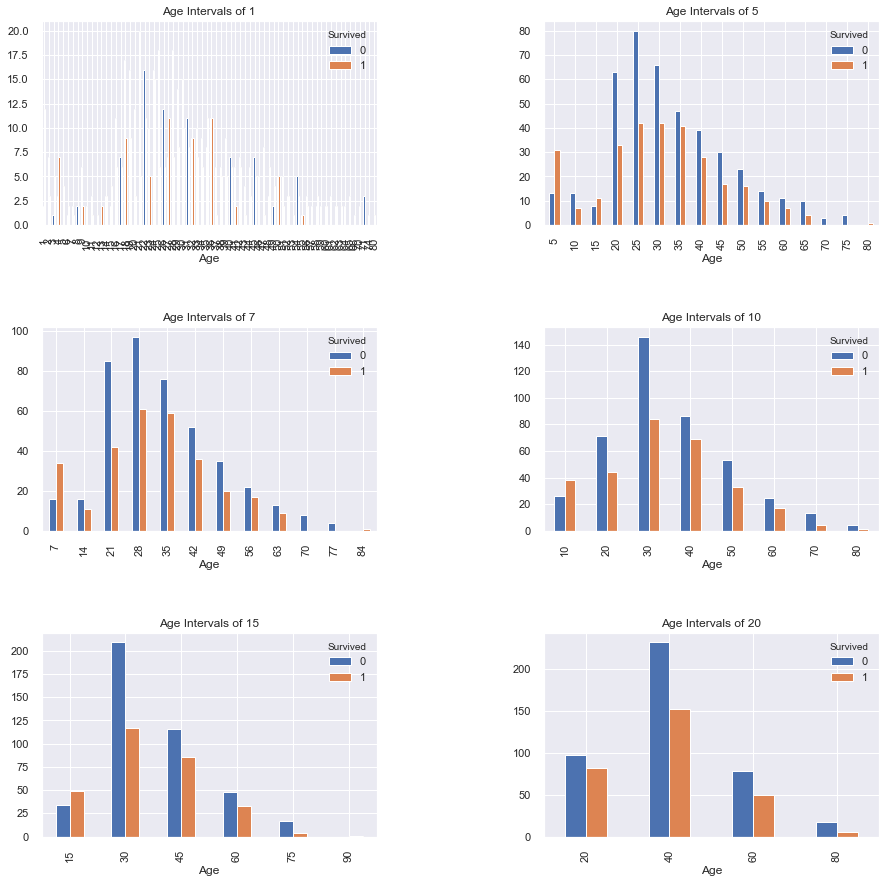

In [57]:
n = [1,5,7,10,15,20]
plot = [0] * len(n)
fig, axis = plt.subplots(nrows=3, ncols=2)

for i in range(len(n)):
    bins=[j for j in range(0, train.Age.dropna().astype(int).max()+max(n), n[i])]
    labels=[j*n[i] for j in range(1,len(bins))]
    Age_Interval=pd.cut(train.Age, bins=bins, include_lowest=True, labels=labels)
    pd.crosstab(Age_Interval, train.Survived).plot(kind='bar', ax=axis.flat[i], figsize=(15,15), 
                                         title = 'Age Intervals of {}'.format(n[i]))
    plt.subplots_adjust(hspace=0.5, wspace = 0.5)

We can observe when set a interval of 1 year, the plot becomes difficult to interpret. Similarly, grouping passengers to 20 year age groups is not that informative. Based on available plots, grouping by intervals of 7 years seem to capture essentials. Cutoffs of 5 and 10 are also good choices.

<br> The plots also tells us young passengers were likely to survive.

Now before creating <i>AgeCategory</i> field, we should fill in <i>Null</i> values in <i>Age</i>. Again, there are many possibilities. A very simple and quick yet effective method would be to utilize mean or median age. I'd suggest builiding upon this idea and consider other available features to determine the missing ages. 

We can create different tables for a deeper understanding. First we start with age and survival.

In [58]:
train[['Age','Survived']].groupby(['Survived']).mean()

,Age
Survived,
0,30.626179
1,28.343690


Average age based on survival is very close.

In [59]:
train[['Age','Sex']].groupby(['Sex']).mean()

,Age
Sex,
0,27.915709
1,30.726645


Average age based on gender is also very similar, with men being slightly older than women.

In [60]:
train[['Age','Alone']].groupby(['Alone']).mean()

,Age
Alone,
0,26.413452
1,32.220297


We can see those that are alone have a higher average age. Those that are with family have a lower average age which might be due to having kids that are younger.

In [61]:
train[['Age','FamilySizeCategory']].groupby(['FamilySizeCategory']).mean()

,Age
FamilySizeCategory,
1,32.220297
2,28.101042
3,18.133333
4,15.666667


Parallel to previous point, the bigger the family size the lower average age becomes.

In [62]:
train[['Age','Pclass']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


The higher the passenger class the higher average age becomes.

In [63]:
train[['Age','Title']].groupby(['Title']).mean()

,Age
Title,
1,32.368090
2,35.898148
3,21.773973
4,4.574167
5,42.384615


Finally relationship between title and age is interesting. First let's remind ourselves about titles.

<code> test['Title']=test.Title.replace({'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Others':5}) </code>

A very obvious observation is that those with title Master are very young. 

In [64]:
print('The oldest person with title \'Master\' in the training dataset is {} years old.'
      .format(int(train[train.Title==4].Age.max())))

The oldest person with title 'Master' in the training dataset is 12 years old.


Therefore, we can start to fill in missing ages for those with 'Master' title. Their average age is 4.5 years old, so we will assign them an age of 5 for those that are missing age.

In [65]:
train.loc[train.Title == 4,'Age'] = train.loc[train.Title == 4,'Age'].fillna(5)

Besides, those with title 'Others' have relatively higher age. Let's see how many of them are missing age.

In [66]:
train[train.Title == 5].Age.isnull().sum()

1

Since there is only one indivdual with missing age in that group we can just assign 42 to it.

In [67]:
train.loc[train.Title == 5,'Age'] = train.loc[train.Title == 5,'Age'].fillna(42)

By examing title and age we can also note those with title 'Miss' are relatively younger compared to those with titles 'Mr' and 'Miss'. We can dig deeper into this category by considering their Passenger Class and whether they were travelling by themselves.

In [68]:
train[train.Title==3][['Age']].groupby([train.Title,train.Alone, train.Pclass]).mean()

Age
Title Alone Pclass           
3     0     1       25.714286
            2       11.714286
            3        9.424242
      1     1       33.750000
            2       30.694444
            3       22.263889

Based on these values we can make the following assignments for missing ages:

In [69]:
train.loc[(train.Title == 3)&(train.Alone == 0)&(train.Pclass == 1),'Age'] = \
train.loc[(train.Title == 3)&(train.Alone == 0)&(train.Pclass == 1),'Age'].fillna(25)

train.loc[(train.Title == 3)&(train.Alone == 0)&(train.Pclass == 2),'Age'] = \
train.loc[(train.Title == 3)&(train.Alone == 0)&(train.Pclass == 2),'Age'].fillna(12)

train.loc[(train.Title == 3)&(train.Alone == 0)&(train.Pclass == 3),'Age'] = \
train.loc[(train.Title == 3)&(train.Alone == 0)&(train.Pclass == 3),'Age'].fillna(10)

train.loc[(train.Title == 3)&(train.Alone == 1)&(train.Pclass == 1),'Age'] = \
train.loc[(train.Title == 3)&(train.Alone == 1)&(train.Pclass == 1),'Age'].fillna(34)

train.loc[(train.Title == 3)&(train.Alone == 1)&(train.Pclass == 2),'Age'] = \
train.loc[(train.Title == 3)&(train.Alone == 1)&(train.Pclass == 2),'Age'].fillna(31)

train.loc[(train.Title == 3)&(train.Alone == 1)&(train.Pclass == 3),'Age'] = \
train.loc[(train.Title == 3)&(train.Alone == 1)&(train.Pclass == 3),'Age'].fillna(22)

We are going to follow the same idea for those with Title 'Mr' and 'Mrs'. We can code this to speed up the process.

In [70]:
Title_value = [1,2]
Alone_values = train.Alone.unique().tolist()
Pclass_values = train.Pclass.unique().tolist()

In [71]:
for i in range(1,len(Title_value)+1):
    Age_TitleAloneClass = train[train.Title==i][['Age']].groupby([train.Title,train.Alone, train.Pclass]).mean()
    for j in range(len(Alone_values)):
        for k in range(1,len(Pclass_values)+1):
            train.loc[(train.Title == i)&(train.Alone == j)&(train.Pclass == k),'Age'] \
            = train.loc[(train.Title == i)&(train.Alone == j)&(train.Pclass == k),'Age'] \
            .fillna(int(Age_TitleAloneClass.Age[i][j][k]))

For reference, these are the values that are assigned.

In [72]:
train[train.Title==2][['Age']].groupby([train.Title,train.Alone, train.Pclass]).mean()

Age
Title Alone Pclass           
2     0     1       39.710526
            2       32.000000
            3       32.540541
      1     1       51.250000
            2       38.272727
            3       47.000000

In [73]:
train[train.Title==1][['Age']].groupby([train.Title,train.Alone, train.Pclass]).mean()

Age
Title Alone Pclass           
1     0     1       38.300000
            2       32.200000
            3       26.518182
      1     1       44.261194
            2       33.015152
            3       29.130682

At this point we must have taken care of the missing age values. A quick sanity check that there is no other missing age:

In [74]:
train.Age.isnull().sum()

0

As mentioned before, we are going to group age in 7 years interval now and create a new field <i>AgeCategory</i> instead.

In [75]:
bins=[j for j in range(0, train.Age.astype(int).max()+7, 7)]
labels=[j for j in range(1,len(bins))]
train['AgeCategory'] = pd.cut(train.Age, bins=bins, include_lowest=True, labels=labels)

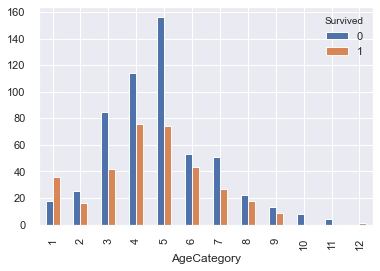

In [76]:
pd.crosstab(train.AgeCategory, train.Survived).plot(kind='bar')

We can see after filling in the missing values, the plot kept its shape which can be a good sign. Now we can drop <i>Age</i> field and apply the same changes to the test dataset. 

In [77]:
test.loc[test.Title == 4,'Age'] = test.loc[test.Title == 4,'Age'].fillna(5)
test.loc[test.Title == 5,'Age'] = test.loc[test.Title == 5,'Age'].fillna(42)

Title_value = [1,2,3]
Alone_values = train.Alone.unique().tolist()
Pclass_values = train.Pclass.unique().tolist()

for i in range(1,len(Title_value)+1):
    Age_TitleAloneClass = train[train.Title==i][['Age']].groupby([train.Title,train.Alone, train.Pclass]).mean()
    for j in range(len(Alone_values)):
        for k in range(1,len(Pclass_values)+1):
            test.loc[(test.Title == i)&(test.Alone == j)&(test.Pclass == k),'Age'] \
            = test.loc[(test.Title == i)&(test.Alone == j)&(test.Pclass == k),'Age'] \
            .fillna(int(Age_TitleAloneClass.Age[i][j][k]))

bins=[j for j in range(0, train.Age.astype(int).max()+7, 7)]
labels=[j for j in range(1,len(bins))]
test['AgeCategory'] = pd.cut(test.Age, bins=bins, include_lowest=True, labels=labels)

In [78]:
test.Age.isnull().sum()

0

In [79]:
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis = 1, inplace = True)

In [80]:
train.head()

,Survived,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Title,Alone,FamilySizeCategory,AgeCategory
0,0,3,1,A/5 21171,7.2500,NaN,S,1,0,2,4
1,1,1,0,PC 17599,71.2833,C85,C,2,0,2,6
2,1,3,0,STON/O2. 3101282,7.9250,NaN,S,3,1,1,4
3,1,1,0,113803,53.1000,C123,S,2,0,2,5
4,0,3,1,373450,8.0500,NaN,S,1,1,1,5


In [81]:
test.head()

,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Title,Alone,FamilySizeCategory,AgeCategory
0,3,1,330911,7.8292,NaN,Q,1,1,1,5
1,3,0,363272,7.0000,NaN,S,2,0,2,7
2,2,1,240276,9.6875,NaN,Q,1,1,1,9
3,3,1,315154,8.6625,NaN,S,1,1,1,4
4,3,0,3101298,12.2875,NaN,S,2,0,2,4


Now we get to the last four features in this dataset:
<li>Ticket</li>
<li>Fare</li>
<li>Cabin</li>
<li>Embarked</li>

Let's do some preliminary analysis on the Ticket field.

In [82]:
train.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [83]:
train.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
3101295     6
           ..
250646      1
347464      1
368323      1
349248      1
349910      1
Name: Ticket, Length: 681, dtype: int64

In [84]:
print('There are {} unique values in Ticket.'.format(train.Ticket.nunique()))

There are 681 unique values in Ticket.


In [85]:
train.Ticket.value_counts()[train.Ticket.value_counts()>=3]

347082           7
1601             7
CA. 2343         7
CA 2144          6
3101295          6
347088           6
S.O.C. 14879     5
382652           5
349909           4
113781           4
4133             4
17421            4
PC 17757         4
W./C. 6608       4
19950            4
2666             4
347077           4
113760           4
LINE             4
248727           3
371110           3
PC 17572         3
13502            3
24160            3
PC 17582         3
110413           3
345773           3
230080           3
239853           3
PC 17755         3
C.A. 34651       3
363291           3
PC 17760         3
F.C.C. 13529     3
SC/Paris 2123    3
35273            3
C.A. 31921       3
29106            3
110152           3
347742           3
Name: Ticket, dtype: int64

It appears some tickets are numeric values only and some other are alphanumeric. There is also a ticket 'LINE' that is alphabetical. 

Let's extract digits and letters for each ticket where applicable and generate some plots for further insights.

First we will examine how many tickets do not contain any digits. We have already found tickets with 'LINE'. However, we need to solidify our observation.

In [86]:
train[train.Ticket.str.extract('(?<!\S)(\d+)(?!\S)', expand=False).isnull()]

,Survived,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Title,Alone,FamilySizeCategory,AgeCategory
179,0,3,1,LINE,0.0,NaN,S,1,1,1,6
271,1,3,1,LINE,0.0,NaN,S,1,1,1,4
302,0,3,1,LINE,0.0,NaN,S,1,1,1,3
597,0,3,1,LINE,0.0,NaN,S,1,1,1,7


It appears there are 4 tickets in total that do not contain any digists and they are all denoted as 'LINE'. It is intersting to note that all of those passengers are in the lower socio-economic class, male, alone and embarked from the same place.

For now we will ignore these rows when extracting numbers from tickets. Next we will look into the number of digits and group them like that. So for instance we want to know the frequency of tickets with only one digit, two digits and so forth. As you might have noticed, some of the tickets that contain letters have digits in one group and another group of digist seperated by a space. The first row, for example, the ticket number is 'A/5 21171'. For this part, we only extract digits after the space. So when we extract digits, we will get '21171' and not '52271'. Let's explore now.

In [87]:
train.Ticket.str.extract('(?<!\S)(\d+)(?!\S)', expand=False).dropna().astype(
    str).map(len).value_counts().sort_index(ascending=False)

7     44
6    423
5    246
4    165
3      7
1      2
Name: Ticket, dtype: int64

We note most of tickets are 6 digits long. We can visualize this with a barplot as well; however, note there is no 2 digit long ticket. Therefore we need to take care of that first. We do this by adding index 2 and assign the value of 0 to it. 

<Figure size 432x288 with 0 Axes>

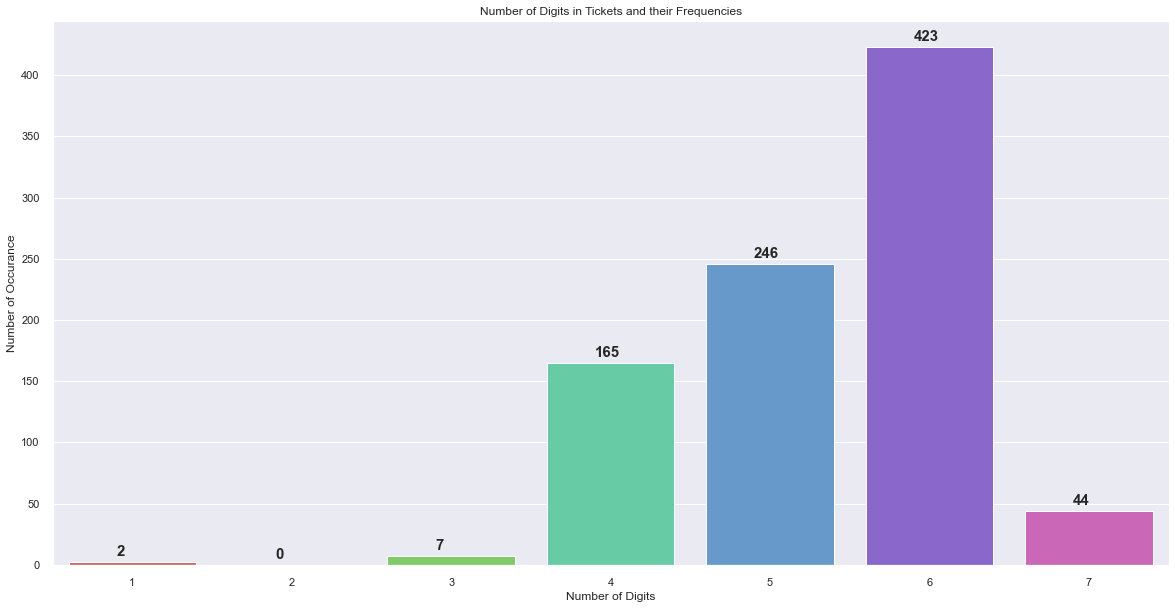

In [88]:
Tickets_DigitsLength = \
train.Ticket.str.extract('(?<!\S)(\d+)(?!\S)', expand=False).dropna(). \
astype(str).map(len).value_counts().sort_index(ascending=False)

Tickets_DigitsLength = Tickets_DigitsLength.reindex(
    list(range(Tickets_DigitsLength.index.min(),Tickets_DigitsLength.index.max()+1)),
    fill_value=0).sort_index(ascending=False)

plt.figure()
plt.figure(figsize=(20,10))
ax = sb.barplot([i for i in range(1,Tickets_DigitsLength.size+1)],
            Tickets_DigitsLength.reindex(list(range(
                Tickets_DigitsLength.index.min(),Tickets_DigitsLength.index.max()+1)),
                                         fill_value=0), palette='hls')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.3, p.get_height() + 5), fontsize=15,
               fontweight='bold')
    


ax.set_title('Number of Digits in Tickets and their Frequencies')
ax.set_xlabel('Number of Digits')
ax.set_ylabel('Number of Occurance')

plt.show()


The next step would be to decide how many digits are important. If we keep all the digits, maybe we will not get a accurate picture. So we need to find the sweet spot. While noting that there might be correlation between number of digits with fields like Sex and Alone, we only put our focus towards number of digits and Passenger Class. One may expect there would be a correlation between the two. Let's explore this idea.

In [89]:
train.Ticket.str.extract(r'(\d+)', expand=False).fillna(1).astype(str).map(len).max()

7

In [90]:
Pclass_NumOfDigits_Corr = [0]*7 # 7 is the maximum number of digits we get in a ticket.
for i in range(1,8):
    Pclass_NumOfDigits_Corr[i-1]=train.Pclass.corr(train.Ticket.str.extract(r'(?<!\S)(\d+)(?!\S)', 
                expand=False).dropna().astype(str).str[0:i].astype('int64'))

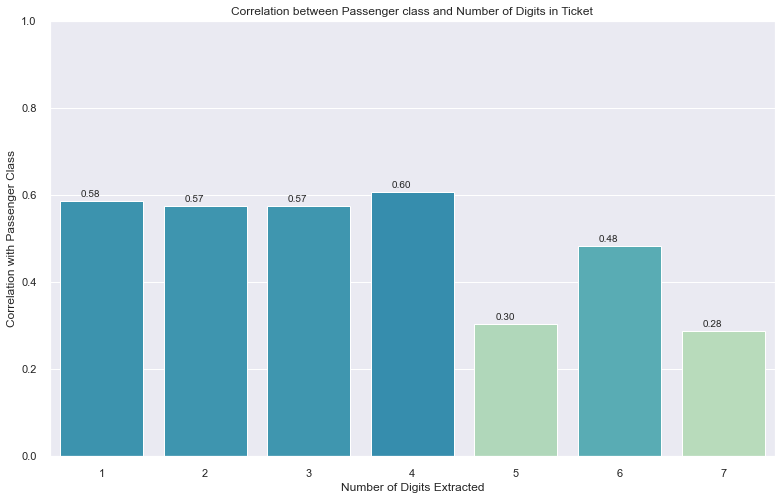

In [91]:
plt.figure(figsize=(13,8))
ax3 = sb.barplot([i for i in range(1,8)], Pclass_NumOfDigits_Corr, palette=cm.YlGnBu(Pclass_NumOfDigits_Corr))
for p in ax3.patches:
    ax3.annotate(str(p.get_height())[0:4], (p.get_x() + 0.2, p.get_height() + 0.01))
ax3.set_title('Correlation between Passenger class and Number of Digits in Ticket')
ax3.set_xlabel('Number of Digits Extracted');
ax3.set_ylabel('Correlation with Passenger Class');
plt.ylim(0, 1)
plt.show()

We can see there is a strong correlation between Passenger Class and the first four number of digits on the ticket. Since the difference in correlation between the first digit and the first four digits is minimal, we will work with the first digit of the ticket going forward.

We are going to create a new field <i>Ticket_FirstDigit</i> that has the first digit as it appear on the ticket. To address the missing values (i.e. those that do not have digits), we assign the value of 0 for now. Let's see the relation of this field with survival and passenger class.

In [92]:
train['Ticket_FirstDigit'] = \
train.Ticket.str.extract(r'(?<!\S)(\d+)(?!\S)', expand=False).fillna(0).astype(str).str[0:1].astype('int64')

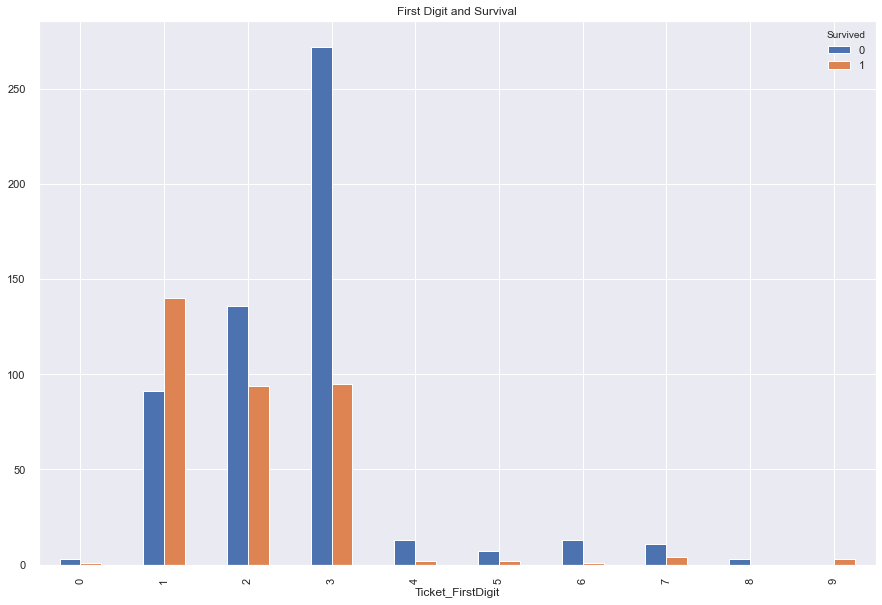

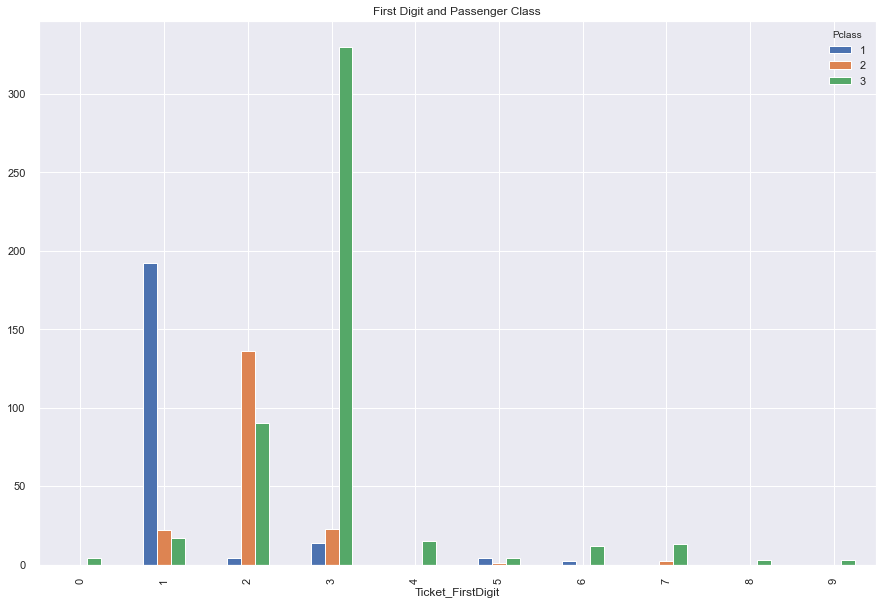

In [93]:
pd.crosstab(train.Ticket_FirstDigit,train.Survived).plot(kind='bar', figsize=(15,10), 
                        title='First Digit and Survival')
pd.crosstab(train.Ticket_FirstDigit,train.Pclass).plot(kind='bar', figsize=(15,10),
                                                      title='First Digit and Passenger Class')
plt.show()

There are some interesting observations we can make:
<li> Majority of tickets begin with digits 1,2 and 3.</li>
<li> Majority of ticket holders that their tickets begin with 1 belong to the upper class passengers. </li>
<li> Majority of ticket holders that their tickets begin with 2 belong to the middle class passengers. </li>
<li> Majority of ticket holders that their tickets begin with any other numbers belong to the upper class passengers. </li>
<li> Tickets that begin with 1 is the only set of tickets and the number of survivals are higher than those that did not (with exception of tickets that begin with 9. We note there are not many of them.)</li>

Based on these observations, we can group tickets into four categories
<ol>
    <li>Tickets that begin with 1.</li>
    <li>Tickets that begin with 2.</li>
    <li>Tickets that begin with 3.</li>
    <li>Tickets that begin with any other number.</li>
</ol>

In [94]:
digits_dict = {1:1, 2:2, 3:3, 0:4, 5:4, 6:4, 7:4, 8:4, 9:4}
train.Ticket_FirstDigit.replace(digits_dict, inplace = True)

Now we can extarct letters and see if we can find any insights.

In [95]:
train.Ticket.str.extract(r'^([^\d]+\d)', expand=False).replace('[^A-Za-z]', '', regex=True).value_counts()

PC           60
CA           41
A            28
STONO        18
SOTONOQ      15
WC           10
SCPARIS       7
SOC           6
C             5
FCC           5
SCParis       4
WEP           3
SOPP          3
PP            3
SWPP          2
SCAH          2
SOTONO        2
PPP           2
FC            1
SCA           1
CASOTON       1
SCOW          1
AS            1
SC            1
SP            1
SOP           1
SCAHBasle     1
Fa            1
Name: Ticket, dtype: int64

In [96]:
print('There are {} that do not contain any letter in tickets'.format(
    train.Ticket.str.extract(r'^([^\d]+\d)', expand=False).replace('[^A-Za-z]', '', regex=True).isnull().sum()))

There are 665 that do not contain any letter in tickets


The preliminary analysis shows there are various groups of letters in ticket. Also majority of tickets do not contain a letter. Let's do some more exploration. For now we are going to keep all these groups of letters, keeping in mind we would put more emphasis on the number occurance of those groups. 

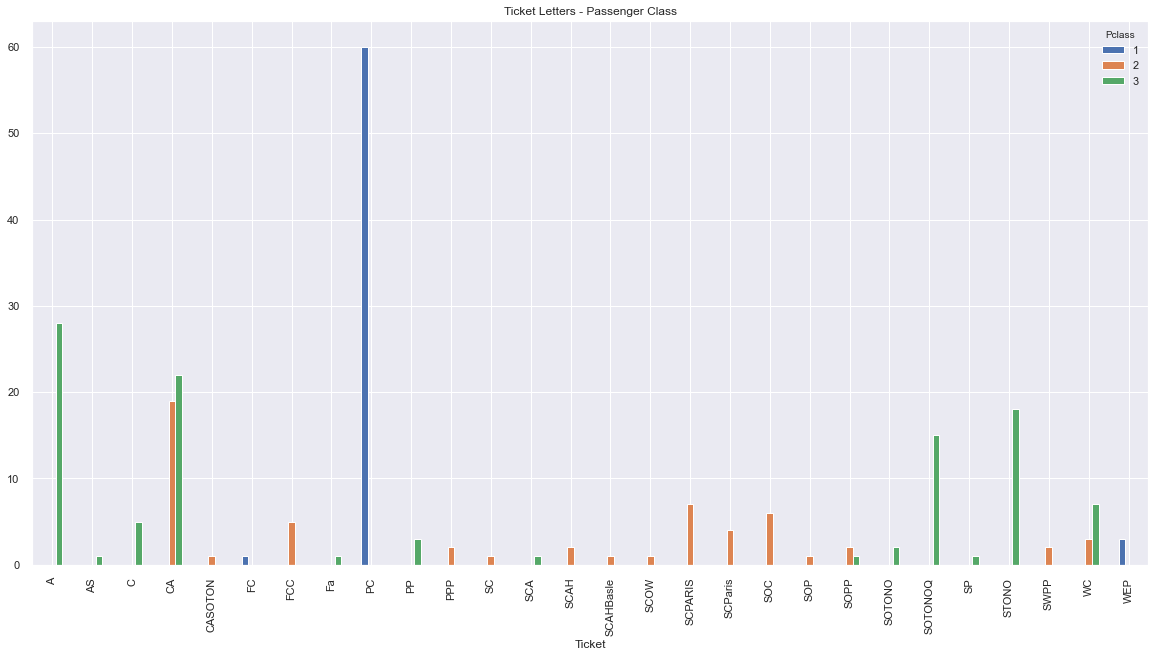

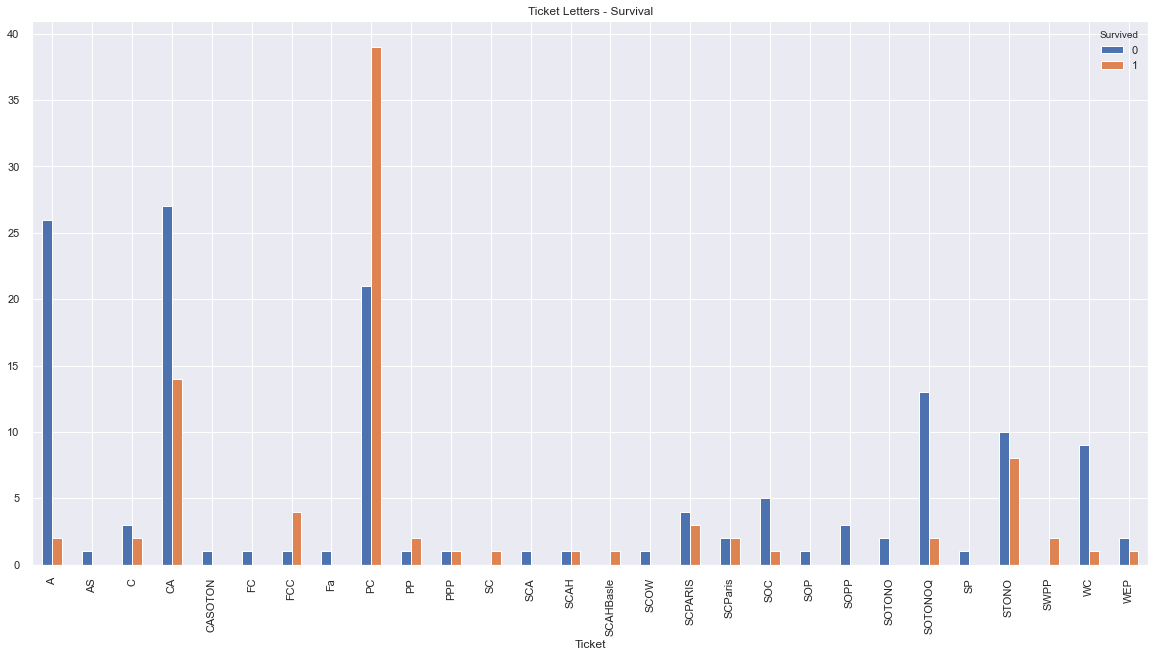

In [97]:
pd.crosstab(train.Ticket.str.extract(r'^([^\d]+\d)', expand=False).replace('[^A-Za-z]', '', regex=True)
            ,train.Pclass).plot(kind='bar', figsize=(20,10), title='Ticket Letters - Passenger Class')
pd.crosstab(train.Ticket.str.extract(r'^([^\d]+\d)', expand=False).replace('[^A-Za-z]', '', regex=True),
            train.Survived).plot(kind='bar', figsize=(20,10), title='Ticket Letters - Survival')

While these plots may be difficult to interpret, it is interesting to see that some letters in the ticket can easily determine the Passenger Class. For instance any tickets that starts with 'PC' correspond to upper level class and most of those passengers survived. On the other hand, passengers whose tickets begin with 'A' were from the lower class and they did not have a good chance of surviving.

It might be plausible to extract only the first letter in each ticket as we did for digits; however, I will keep these groups as they are and only consider those that occur more than 15 times. The rest, including the ones that do not contain a letter will placed in the same category.

In [98]:
train['Ticket_Letter_Category']= \
train.Ticket.str.extract(r'^([^\d]+\d)', expand=False).replace('[^A-Za-z]', '', regex=True)

In [99]:
Ticket_Letter_Count_Dict = train.Ticket_Letter_Category.value_counts().to_dict()

Reminder of value counts:

In [100]:
train.Ticket_Letter_Category.value_counts()

PC           60
CA           41
A            28
STONO        18
SOTONOQ      15
WC           10
SCPARIS       7
SOC           6
C             5
FCC           5
SCParis       4
WEP           3
SOPP          3
PP            3
SWPP          2
SCAH          2
SOTONO        2
PPP           2
FC            1
SCA           1
CASOTON       1
SCOW          1
AS            1
SC            1
SP            1
SOP           1
SCAHBasle     1
Fa            1
Name: Ticket_Letter_Category, dtype: int64

In [101]:
Ticket_LetterCounts_dict1 = {'PC':1, 'CA':2,'A':3,'STONO':4}

Ticket_LetterCounts_dict2 = {k:5 for (k,v) in Ticket_Letter_Count_Dict.items() if v <= 15}

Ticket_LetterCounts_dict = {**Ticket_LetterCounts_dict1, **Ticket_LetterCounts_dict2}

In [102]:
train.Ticket_Letter_Category = train.Ticket_Letter_Category.replace(Ticket_LetterCounts_dict).fillna(5).astype('int64')

Now we can drop the <i>ticket</i> field and apply the same changes to test data set.

In [103]:
test['Ticket_FirstDigit'] = \
test.Ticket.str.extract(r'(?<!\S)(\d+)(?!\S)', expand=False).fillna(0).astype(str).str[0:1].astype('int64')

In [104]:
test.Ticket_FirstDigit.replace(digits_dict, inplace = True)

In [105]:
test['Ticket_Letter_Category']= \
test.Ticket.str.extract(r'^([^\d]+\d)', expand=False).replace('[^A-Za-z]', '', regex=True)

In [106]:
Ticket_Letter_Count_Dict2 = test.Ticket_Letter_Category.value_counts().to_dict()

Ticket_LetterCounts_dict3 = {k:5 for (k,v) in Ticket_Letter_Count_Dict2.items() if v <= 15}

Ticket_LetterCounts_dict2 = {**Ticket_LetterCounts_dict1, **Ticket_LetterCounts_dict3}

In [107]:
test.Ticket_Letter_Category = test.Ticket_Letter_Category.replace(Ticket_LetterCounts_dict2).fillna(5).astype('int64')

In [108]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

And a quick sanity check.

In [109]:
print(train.Ticket_FirstDigit.isnull().sum())
print(test.Ticket_FirstDigit.isnull().sum())
print(train.Ticket_Letter_Category.isnull().sum())
print(test.Ticket_Letter_Category.isnull().sum())

0
0
0
0


Now can move on from <i>Ticket</i> and explore the next field, <i>Fare</i>

In [110]:
print('There are {} unique values in Fare'.format(train.Fare.nunique()))

There are 248 unique values in Fare


In [111]:
train.Fare.value_counts()[train.Fare.value_counts()>4]

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
0.0000     15
7.2292     15
7.8542     13
8.6625     13
7.2500     13
7.2250     12
16.1000     9
9.5000      9
24.1500     8
15.5000     8
56.4958     7
52.0000     7
14.5000     7
14.4542     7
69.5500     7
7.0500      7
31.2750     7
46.9000     6
30.0000     6
7.7958      6
39.6875     6
21.0000     6
27.9000     6
26.2500     6
27.7208     5
30.5000     5
73.5000     5
53.1000     5
15.2458     5
29.1250     5
Name: Fare, dtype: int64

We can see right away that this field has many unique values so probably we need to categorize them. Again, there are many available options; however, I suggest looking into two options:
<ol>
<li>Diving them into groups of the same size, so for instance the cheapest 50 fares will be grouped together and then the next 50 together and so on.</li>
<li>Diving them based on thresholds, so for instance those who paid a fare of less than 50 will be placed in one group and those that are in range [50, 100) in another group and so on.</li>
</ol>

We will try to group them into 6 categories in each option and we will examine the findings for each case. I choose 6 because there are 3 Passenger Classes and choosing a number too close to 3 may make this field redundant. 

<b>Option 1:</b>

In [112]:
pd.cut(train.Fare, 6).value_counts()

(-0.512, 85.388]      825
(85.388, 170.776]      46
(170.776, 256.165]     11
(256.165, 341.553]      6
(426.941, 512.329]      3
(341.553, 426.941]      0
Name: Fare, dtype: int64

In [113]:
pd.crosstab(pd.cut(train.Fare, 6),train.Survived)

Survived,0,1
Fare,,
"(-0.512, 85.388]",534,291
"(85.388, 170.776]",9,37
"(170.776, 256.165]",4,7
"(256.165, 341.553]",2,4
"(426.941, 512.329]",0,3


In [114]:
pd.crosstab(pd.cut(train.Fare, 6),train.Pclass)

Pclass,1,2,3
Fare,,,
"(-0.512, 85.388]",150,184,491
"(85.388, 170.776]",46,0,0
"(170.776, 256.165]",11,0,0
"(256.165, 341.553]",6,0,0
"(426.941, 512.329]",3,0,0


We observe by grouping Fare into equal widths, majority of passengers are in the first group. It is interesting to see as soon as we move on to the second group of Fare size and onwards, all the passengers belong to Upper Class and most of them survived as well.

Let's do the same analysis, this time with (almost) equal sizes.

<b>Option 2:</b>

In [115]:
pd.qcut(train.Fare, 6).value_counts()

(-0.001, 7.775]      156
(7.775, 8.662]       152
(52.369, 512.329]    149
(14.454, 26.0]       149
(26.0, 52.369]       146
(8.662, 14.454]      139
Name: Fare, dtype: int64

In [116]:
pd.crosstab(pd.qcut(train.Fare, 6),train.Survived)

Survived,0,1
Fare,,
"(-0.001, 7.775]",124,32
"(7.775, 8.662]",123,29
"(8.662, 14.454]",88,51
"(14.454, 26.0]",84,65
"(26.0, 52.369]",85,61
"(52.369, 512.329]",45,104


In [117]:
pd.crosstab(pd.qcut(train.Fare, 6),train.Pclass)

Pclass,1,2,3
Fare,,,
"(-0.001, 7.775]",6,6,144
"(7.775, 8.662]",0,0,152
"(8.662, 14.454]",0,86,53
"(14.454, 26.0]",6,53,90
"(26.0, 52.369]",76,32,38
"(52.369, 512.329]",128,7,14


This time we see the widths of our bins change drastically. There are 156 passengers that paid between 0 to 8 and there are 149 passengers that paid between ~52 to 512. One observation between the two kinds of analysis we have done remains the same and that is the more expensive the ticket, the more likely passengers survive. 

<br> I will go ahead with the second option and use that category, since it has more variety in Passenger Class. For the most part, groups are not inclusive to a certain class as in option 1 and apply the same changes to the Test data set while making sure we put them into same bins.

In [118]:
FareCategory, bins = pd.qcut(train.Fare, 6, labels=[i+1 for i in range(6)], retbins=True)

In [119]:
train['FareCategory'] = FareCategory

At this point we recall Fare has a missing value for the test data set. We will try to fill in the missing value by examining other passengers who share similar features.

In [120]:
test[test.Fare.isnull()]

,Pclass,Sex,Fare,Cabin,Embarked,Title,Alone,FamilySizeCategory,AgeCategory,Ticket_FirstDigit,Ticket_Letter_Category
152,3,1,NaN,NaN,S,1,1,1,9,3,5


In [121]:
test[(test.Sex==1) & (test.Pclass==3) & (test.Title==1) & (test.Ticket_FirstDigit==3) & 
     (test.Ticket_Letter_Category==5)].Fare.mean()

8.886321176470588

In [122]:
test.Fare.fillna(9, inplace=True)

In [123]:
test.isnull().sum()

Pclass                      0
Sex                         0
Fare                        0
Cabin                     327
Embarked                    0
Title                       0
Alone                       0
FamilySizeCategory          0
AgeCategory                 0
Ticket_FirstDigit           0
Ticket_Letter_Category      0
dtype: int64

In [124]:
test['FareCategory'] = pd.cut(test.Fare, bins=bins, labels=[i+1 for i in range(6)])

In [125]:
test.FareCategory.isnull().sum()

2

Surprisingly two values have not been categorized, which might be due to an issue with binning. We can look more into them now.

In [126]:
test[test.FareCategory.isnull()]

,Pclass,Sex,Fare,Cabin,Embarked,Title,Alone,FamilySizeCategory,AgeCategory,Ticket_FirstDigit,Ticket_Letter_Category,FareCategory
266,1,1,0.0,NaN,S,1,1,1,7,1,5,NaN
372,1,1,0.0,B52 B54 B56,S,1,1,1,7,1,5,NaN


We note two values with Fare = 0 have not been categorized. They obviously belong to FareCategory = 1 and we can assign them now.

In [127]:
test.FareCategory.fillna(1, inplace=True)

We can drop <i>Fare</i> now.

In [128]:
train.drop('Fare', axis=1, inplace=True)
test.drop('Fare', axis=1, inplace=True)

In [129]:
train

,Survived,Pclass,Sex,Cabin,Embarked,Title,Alone,FamilySizeCategory,AgeCategory,Ticket_FirstDigit,Ticket_Letter_Category,FareCategory
0,0,3,1,NaN,S,1,0,2,4,2,3,1
1,1,1,0,C85,C,2,0,2,6,1,1,6
2,1,3,0,NaN,S,3,1,1,4,3,4,2
3,1,1,0,C123,S,2,0,2,5,1,5,6
4,0,3,1,NaN,S,1,1,1,5,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,NaN,S,5,1,1,4,2,5,3
887,1,1,0,B42,S,3,1,1,3,1,5,5
888,0,3,0,NaN,S,3,0,2,2,4,5,4
889,1,1,1,C148,C,1,1,1,4,1,5,5


Now we can analyze <i>Cabin</i>, while noting it has many missing values.

In [130]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [131]:
print('Cabin has {} missing values and {} unique values'.format(train.Cabin.isnull().sum(),train.Cabin.nunique()))

Cabin has 687 missing values and 147 unique values


Similar to <i>Ticket</i>, <i>Cabin</i> is also formed by letters and digits. Let's extract letters and first digits as before.

In [132]:
train.Cabin.str.extract('([A-Za-z]?)')[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: 0, dtype: int64

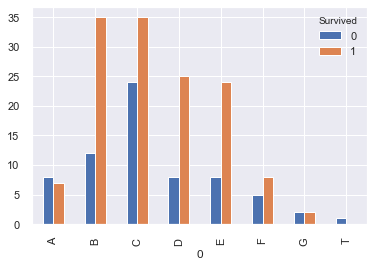

In [133]:
pd.crosstab(train.Cabin.str.extract('([A-Za-z]?)')[0], train.Survived).plot(kind='bar')

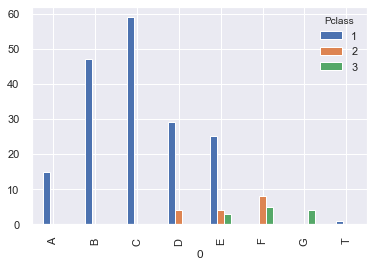

In [134]:
pd.crosstab(train.Cabin.str.extract('([A-Za-z]?)')[0], train.Pclass).plot(kind='bar')

We see majority of passengers that have their cabin information available are from the Upper class and many of them survived too.

Let's extract first digtis now.

In [135]:
train.Cabin.str.extract('(\d{1})')[0].value_counts()

1    40
2    32
3    31
4    21
6    18
5    18
7    15
9    14
8    11
Name: 0, dtype: int64

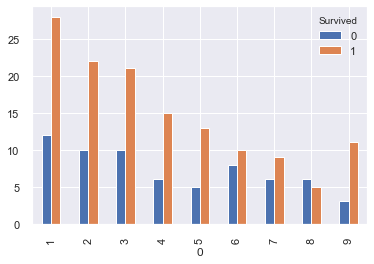

In [136]:
pd.crosstab(train.Cabin.str.extract('(\d{1})')[0], train.Survived).plot(kind='bar')

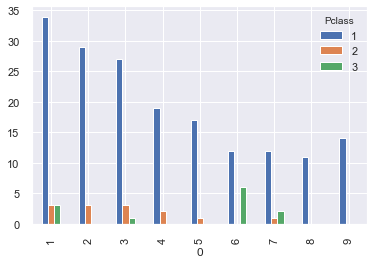

In [137]:
pd.crosstab(train.Cabin.str.extract('(\d{1})')[0], train.Pclass).plot(kind='bar')

Extracing first digits may not tell us much this time.

Based on the analysis we have done we can group cabins whose first letters correspond to more survivals than those that lost their lives into one (B, C, D, E, F) and the rest including those with missing values in another group. We will ingore first digits.

In [138]:
Cabin_Dictionary = {'A':1, 'B':2, 'C':2, 'D':2, 'E':2, 'F':2, 'G':1, 'T':1}

Making sure Cabin's first letters in the test data set is in train data set.

In [139]:
set(train.Cabin.str.extract('([A-Za-z]?)')[0].unique()).difference(
    set(test.Cabin.str.extract('([A-Za-z]?)')[0].unique()))

{'T'}

In [140]:
set(test.Cabin.str.extract('([A-Za-z]?)')[0].unique()).difference(
    set(train.Cabin.str.extract('([A-Za-z]?)')[0].unique()))

set()

In [141]:
train.Cabin.fillna('T', inplace=True)
test.Cabin.fillna('T', inplace=True)

In [142]:
train['Cabin'] = train.Cabin.str.extract('([A-Za-z]?)')[0].replace(Cabin_Dictionary)

In [143]:
test['Cabin'] = test.Cabin.str.extract('([A-Za-z]?)')[0].replace(Cabin_Dictionary)

In [144]:
train

,Survived,Pclass,Sex,Cabin,Embarked,Title,Alone,FamilySizeCategory,AgeCategory,Ticket_FirstDigit,Ticket_Letter_Category,FareCategory
0,0,3,1,1,S,1,0,2,4,2,3,1
1,1,1,0,2,C,2,0,2,6,1,1,6
2,1,3,0,1,S,3,1,1,4,3,4,2
3,1,1,0,2,S,2,0,2,5,1,5,6
4,0,3,1,1,S,1,1,1,5,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,S,5,1,1,4,2,5,3
887,1,1,0,2,S,3,1,1,3,1,5,5
888,0,3,0,1,S,3,0,2,2,4,5,4
889,1,1,1,2,C,1,1,1,4,1,5,5


We get to the last field, <i>Embarked</i>. By description, embarked indicates port of embarkation:
<li>C = Cherbourg</li>
<li>Q = Queenstown</li>
<li>S = Southampton</li>

There does not seem to be much for exploration here; however, I will include a few plots and I will assign values 1, 2 and 3 to these three ports.

In [145]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

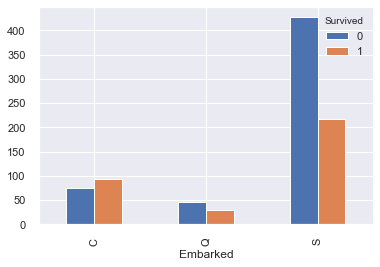

In [146]:
pd.crosstab(train.Embarked, train.Survived).plot(kind='bar')

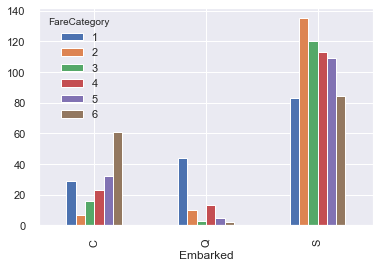

In [147]:
pd.crosstab(train.Embarked, train.FareCategory).plot(kind='bar')

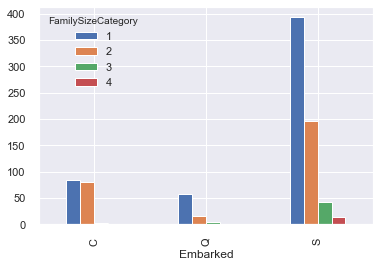

In [148]:
pd.crosstab(train.Embarked, train.FamilySizeCategory).plot(kind='bar')

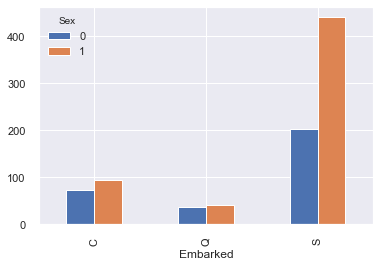

In [149]:
pd.crosstab(train.Embarked, train.Sex).plot(kind='bar')

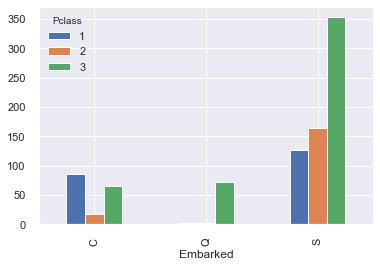

In [150]:
pd.crosstab(train.Embarked, train.Pclass).plot(kind='bar')

By examining these plots, we can observe majority of passengers embarked from Cherbourg survived and they were in the upper class. We are going to replace these ordinal values. We also note there are misssing values in Embarked that needs to be addressed. As before, we will try to replace these values with information of passengers that share similar features.

In [151]:
train[train.Embarked.isnull()]

,Survived,Pclass,Sex,Cabin,Embarked,Title,Alone,FamilySizeCategory,AgeCategory,Ticket_FirstDigit,Ticket_Letter_Category,FareCategory
61,1,1,0,2,NaN,3,1,1,6,1,5,6
829,1,1,0,2,NaN,2,1,1,9,1,5,6


In [152]:
train[(train.Survived == 1) & (train.Sex == 0) & (train.Alone == 1) & (train.Ticket_FirstDigit == 1) & 
      (train.FareCategory == 6)].Embarked.value_counts()

C    14
S     9
Name: Embarked, dtype: int64

So we can see majority of people with similar features are coming from Cherbourg, therefore we assign them that port for embarkation.

In [153]:
train.Embarked.fillna('C', inplace = True)

Now we are going to make the feature ordinal and apply the same changes to the test data set.

In [154]:
Embarked_Dictionary = {'C':1, 'Q':2, 'S':3}

In [155]:
train.Embarked.replace(Embarked_Dictionary, inplace = True)
test.Embarked.replace(Embarked_Dictionary, inplace = True)

In [156]:
train.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [157]:
print(train.isnull().sum(), sep='\n')
print('-'*20)
print(test.isnull().sum(), sep='\n')

Survived                  0
Pclass                    0
Sex                       0
Cabin                     0
Embarked                  0
Title                     0
Alone                     0
FamilySizeCategory        0
AgeCategory               0
Ticket_FirstDigit         0
Ticket_Letter_Category    0
FareCategory              0
dtype: int64
--------------------
Pclass                    0
Sex                       0
Cabin                     0
Embarked                  0
Title                     0
Alone                     0
FamilySizeCategory        0
AgeCategory               0
Ticket_FirstDigit         0
Ticket_Letter_Category    0
FareCategory              0
dtype: int64


We have analyzed all the features and now we will get started with training our models.

# Training Model and Sumbission

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
X_train = train.drop(['Survived'], axis=1)
y_train = train["Survived"]
X_test  = test.copy()
X_train.shape, y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

Now we are going to train our model using various Machine Learning techniques and compare the results at the end.

In [160]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_train)
acc_svc = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_svc)

85.07


In [161]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(loss='hinge', max_iter=10000)
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_train)
acc_linear_svc = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_linear_svc)

82.15


In [162]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=200,max_depth=7)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_train)
acc_randomforest = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_randomforest)

87.43


In [163]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(max_depth=6, max_features='log2')
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_train)
acc_decisiontree = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_decisiontree)

84.62


In [164]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(n_iter_no_change=10, early_stopping=True)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_train)
acc_sgd = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_sgd)

77.55


In [165]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, algorithm='brute')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
acc_knn = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_knn)

85.63


In [166]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=2, penalty='l2', max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
acc_logreg = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_logreg)

82.94


In [167]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_train)
acc_gaussian = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_gaussian)

77.1


In [168]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, n_iter_no_change=5)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_train)
acc_perceptron = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_perceptron)

77.55


In [169]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5)
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_train)
acc_gbk = round(accuracy_score(y_train, y_pred) * 100, 2)
print(acc_gbk)

91.58


In [170]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,91.58
3,Random Forest,87.43
1,KNN,85.63
0,Support Vector Machines,85.07
7,Decision Tree,84.62
2,Logistic Regression,82.94
6,Linear SVC,82.15
5,Perceptron,77.55
8,Stochastic Gradient Descent,77.55
4,Naive Bayes,77.10


In [171]:
SubmissionPrediction = logreg.predict(test)

In [172]:
PassengerId = [i for i in range(892,1310)]

In [173]:
SubmissionPrediction_df = pd.DataFrame({'PassengerId': PassengerId, 'Survived':SubmissionPrediction })
SubmissionPrediction_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [174]:
SubmissionPrediction_df.to_csv("Submission.csv", index = False)

If you have made it this far, thank you! 😉

I have taken advatange of many available online resources to publish this notebook, including some on Kaggle. I am by no means an expert in the subject. Please feel free to share your comments and thoughts and any feedback on how I can improve.

Thanks! 🙏